## part 1

In [184]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [257]:
def filtcheck(m,fil):
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            if fil[i,j]!=-1 and m[i,j]!=fil[i,j]:
                return False
    return True
            

In [310]:
def filtfunc(i,f):
    y = i.copy()
    for j in range(1,i.shape[0]-1):
        for k in range(1,i.shape[1]-1):
            if filtcheck(i[j-1:j+2,k-1:k+2],f):
#                 print("ok")
                y[j,k]=0
    
    return y

        

In [313]:
def skeletonize(im):
    s1 = np.array([[0,0,0],[-1,1,-1],[1,1,1]])
    s2 = np.array([[-1,0,0],[1,1,0],[-1,1,-1]])
    i = (im < 127).astype(np.uint8)
    
#     _,i = cv2.threshold(im,127,255,cv2.THRESH_BINARY)
#     sub = np.ones(i.shape)
#     i = sub - i
    count = 0
    while True:
        count = count+1
        j = i
#         for x in range(4):
#             j = filtfunc(j,s1)    
#             j = filtfunc(j,s2)    
#             s1 = np.rot90(s1)
#             s2 = np.rot90(s2)

        j = filtfunc(filtfunc(j,s1),s2);
        j = filtfunc(filtfunc(j,np.rot90(s1,1)),np.rot90(s2,1));
        j = filtfunc(filtfunc(j,np.rot90(s1,2)),np.rot90(s2,2));
        j = filtfunc(filtfunc(j,np.rot90(s1,3)),np.rot90(s2,3));
        
        change = np.mean(np.abs(j-i))
        if(change < 0.005):
            break
        else:
            i = j
            
    plt.subplot(121)
    plt.imshow(im,cmap='gray')
    plt.subplot(122)
    plt.imshow(j,cmap='gray')
    plt.show()
    print(count)
        

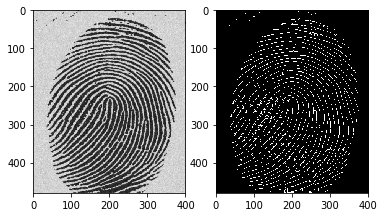

6


In [312]:
im = cv2.imread('../input_data/finger.jpg',0)
skeletonize(im)

## part 2

#### S1 and it’s rotated versions will detect edges
#### S2 and it’s rotated versions will detect the corners on top-right, top-left, bottom-right, bottom-left.

## part 3

#### Multiple passes result in a thinner boundary and exact skeletonization of the image. The skeleton gets thinner with each pass.

## part 4
#### for solid shape

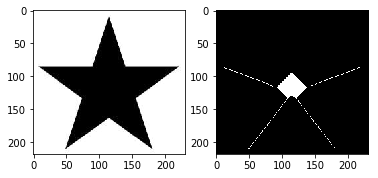

34


In [296]:
im2 = cv2.imread("../input_data/star.jpg",0)
skeletonize(im2)

#### for shape with holes

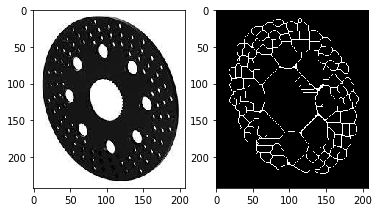

19


In [283]:
im3 = cv2.imread("../input_data/object.jpg",0)
skeletonize(im3)

#### thin objects

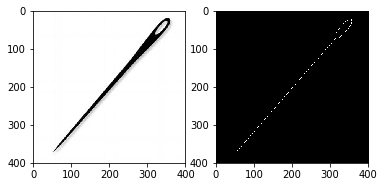

15


In [314]:
im4 = cv2.imread("../input_data/needle.jpg",0)
skeletonize(im4)

#### irregular

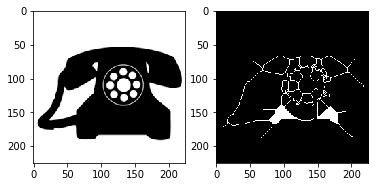

23


In [291]:
im5 = cv2.imread("../input_data/phone.png",0)
skeletonize(im5)